# Slovenia Vignette Sales Analysis (2020-2025)

## Objective
Analyze vignette sales trends and create a timeline showing active vignettes by type to distinguish between holiday traffic (weekly vignettes) and regular traffic.

### Vignette Types:
- **Letna (Yearly)**: 1S (motorcycles), 2A (cars <3.5t), 2B (motorhomes)
- **Polletna (Half-yearly)**: 1S only
- **Mesečna (Monthly)**: 2A, 2B
- **Tedenska (Weekly)**: 1S, 2A, 2B - Key indicator of holiday/tourist traffic

### Note:
- Date parsing issue in cell 4 has been fixed
- The notebook is now ready to run all cells sequentially

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Libraries loaded successfully")

Libraries loaded successfully


## 1. Load and Explore Data

In [5]:
# Load data
file_path = '../data/Podatki o prodaji vinjet 01 01 2020 - 31 07 2025.xlsx'

# Load monthly data (2020-2022)
df_monthly = pd.read_excel(file_path, sheet_name='podatki 20_21_22-1')
print(f"Monthly data shape: {df_monthly.shape}")
print(f"Date range: {df_monthly['leto'].min()}-{df_monthly['mesec'].min():02d} to {df_monthly['leto'].max()}-{df_monthly['mesec'].max():02d}")

# Load daily data (2022-2025)
df_daily = pd.read_excel(file_path, sheet_name='podatki jan 22 do jul 25')
print(f"\nDaily data shape: {df_daily.shape}")
print(f"Unique vignette types: {df_daily['vrsta'].unique()}")

# Display sample
df_daily.head()

Monthly data shape: (225, 4)
Date range: 2020-01 to 2022-12

Daily data shape: (22144, 6)
Unique vignette types: ['Letna 1S' 'Letna 2A' 'Letna 2B' 'Mesečna 2A' 'Mesečna 2B' 'Tedenska 1S'
 'Tedenska 2A' 'Tedenska 2B' 'Polletna 1S']


,leto,mesec,dan,datum,vrsta,število prodanih vinjet
0,2022,2,1,2022-02-01,Letna 1S,15
1,2022,2,1,2022-02-01,Letna 2A,33641
2,2022,2,1,2022-02-01,Letna 2B,3614
3,2022,2,1,2022-02-01,Mesečna 2A,778
4,2022,2,1,2022-02-01,Mesečna 2B,94


In [6]:
# Create date column for monthly data
# Fix: Need to rename columns to match pandas expected names
df_monthly['day'] = 1
df_monthly['date'] = pd.to_datetime(df_monthly[['leto', 'mesec', 'day']].rename(columns={'leto': 'year', 'mesec': 'month'}))

# Ensure date column for daily data
df_daily['date'] = pd.to_datetime(df_daily['datum'])

# Check date ranges
print("Monthly data range:", df_monthly['date'].min(), "to", df_monthly['date'].max())
print("Daily data range:", df_daily['date'].min(), "to", df_daily['date'].max())

# Check for overlaps
overlap_start = max(df_monthly['date'].min(), df_daily['date'].min())
overlap_end = min(df_monthly['date'].max(), df_daily['date'].max())
print(f"\nOverlap period: {overlap_start} to {overlap_end}")

Monthly data range: 2020-01-01 00:00:00 to 2022-01-01 00:00:00
Daily data range: 2022-02-01 00:00:00 to 2025-07-31 00:00:00

Overlap period: 2022-02-01 00:00:00 to 2022-01-01 00:00:00


## 2. Sales Trend Analysis

In [7]:
# Aggregate monthly data by vignette type
monthly_by_type = df_monthly.pivot_table(
    index='date',
    columns='vrsta',
    values='število prodanih vinjet',
    aggfunc='sum',
    fill_value=0
)

print("Monthly sales by vignette type:")
print(monthly_by_type.head())
print(f"\nTotal sales by type (2020-2022):")
print(monthly_by_type.sum().sort_values(ascending=False))

Monthly sales by vignette type:
vrsta       Letna 1S  Letna 2A  Letna 2B  Mesečna 2A  Mesečna 2B  Polletna 1S  \
date                                                                            
2020-01-01       365    401637     26515       21231        1792           20   
2020-02-01       505    216728     14087       19128        1748           64   
2020-03-01       439     21291      1726        6185         684          196   
2020-04-01       139      4962       705        2079         357         1208   
2020-05-01       213     15009      1220       15909        1573         6843   

vrsta       Tedenska 1S  Tedenska 2A  Tedenska 2B  
date                                               
2020-01-01           63       246468        15947  
2020-02-01          137       195442        15885  
2020-03-01           98        73510         7707  
2020-04-01           61        16621         3213  
2020-05-01          602        83472         9331  

Total sales by type (2020-2022):
vr

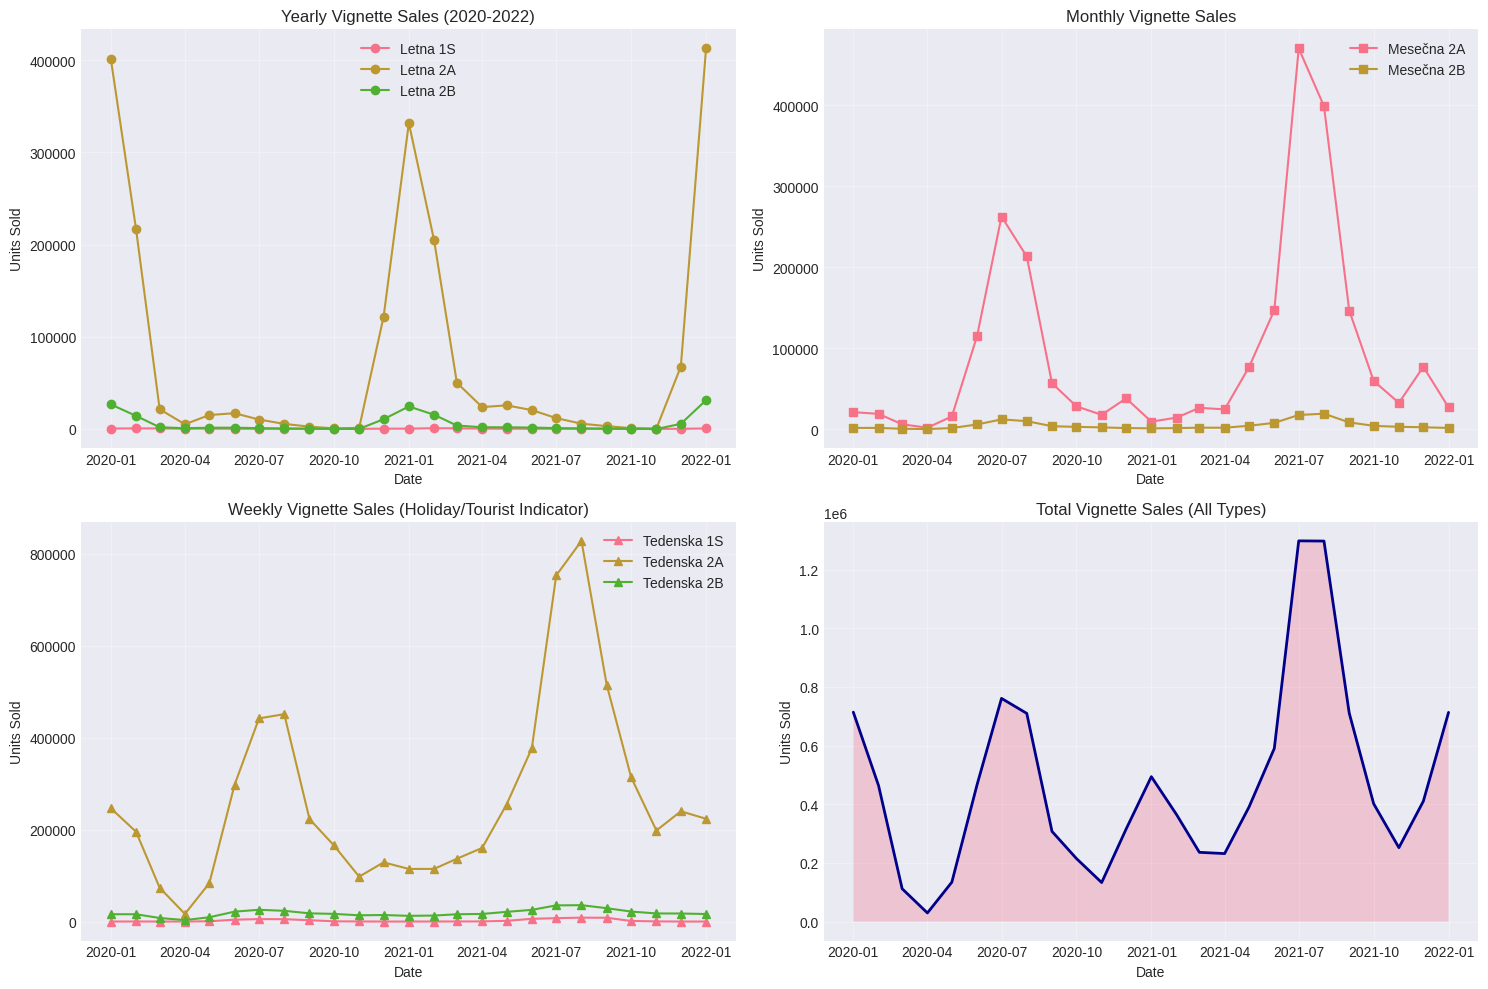

In [8]:
# Visualize long-term trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Yearly vignettes
yearly_types = ['Letna 1S', 'Letna 2A', 'Letna 2B']
for vtype in yearly_types:
    if vtype in monthly_by_type.columns:
        axes[0, 0].plot(monthly_by_type.index, monthly_by_type[vtype], label=vtype, marker='o')
axes[0, 0].set_title('Yearly Vignette Sales (2020-2022)')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Units Sold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Monthly vignettes
monthly_types = ['Mesečna 2A', 'Mesečna 2B']
for vtype in monthly_types:
    if vtype in monthly_by_type.columns:
        axes[0, 1].plot(monthly_by_type.index, monthly_by_type[vtype], label=vtype, marker='s')
axes[0, 1].set_title('Monthly Vignette Sales')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Units Sold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Weekly vignettes (holiday indicator)
weekly_types = ['Tedenska 1S', 'Tedenska 2A', 'Tedenska 2B']
for vtype in weekly_types:
    if vtype in monthly_by_type.columns:
        axes[1, 0].plot(monthly_by_type.index, monthly_by_type[vtype], label=vtype, marker='^')
axes[1, 0].set_title('Weekly Vignette Sales (Holiday/Tourist Indicator)')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Units Sold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Total sales
axes[1, 1].plot(monthly_by_type.index, monthly_by_type.sum(axis=1), color='darkblue', linewidth=2)
axes[1, 1].fill_between(monthly_by_type.index, monthly_by_type.sum(axis=1), alpha=0.3)
axes[1, 1].set_title('Total Vignette Sales (All Types)')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Units Sold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Build Active Vignettes Timeline (Daily Granularity)

In [9]:
# Process daily data
daily_pivot = df_daily.pivot_table(
    index='date',
    columns='vrsta',
    values='število prodanih vinjet',
    aggfunc='sum',
    fill_value=0
)

print(f"Daily data shape: {daily_pivot.shape}")
print(f"Date range: {daily_pivot.index.min()} to {daily_pivot.index.max()}")
print(f"\nVignette types available: {daily_pivot.columns.tolist()}")

Daily data shape: (1277, 9)
Date range: 2022-02-01 00:00:00 to 2025-07-31 00:00:00

Vignette types available: ['Letna 1S', 'Letna 2A', 'Letna 2B', 'Mesečna 2A', 'Mesečna 2B', 'Polletna 1S', 'Tedenska 1S', 'Tedenska 2A', 'Tedenska 2B']


In [10]:
def calculate_active_vignettes(sales_df):
    """
    Calculate number of active vignettes for each day based on validity periods.
    
    Validity periods:
    - Letna (Yearly): 365 days from purchase
    - Polletna (Half-yearly): 180 days from purchase
    - Mesečna (Monthly): 30 days from purchase
    - Tedenska (Weekly): 7 days from purchase
    """
    
    # Initialize result DataFrame
    active_df = pd.DataFrame(index=sales_df.index)
    
    # Define validity periods (in days)
    validity_periods = {
        'Letna': 365,
        'Polletna': 180,
        'Mesečna': 30,
        'Tedenska': 7
    }
    
    # Calculate active vignettes for each type
    for col in sales_df.columns:
        # Determine vignette category
        category = None
        for key in validity_periods.keys():
            if key in col:
                category = key
                break
        
        if category:
            validity_days = validity_periods[category]
            
            # Calculate rolling sum for active vignettes
            active_df[f'active_{col}'] = sales_df[col].rolling(
                window=validity_days, 
                min_periods=1
            ).sum()
    
    return active_df

# Calculate active vignettes
active_vignettes = calculate_active_vignettes(daily_pivot)
print(f"Active vignettes calculated for {len(active_vignettes.columns)} types")
print(f"Columns: {active_vignettes.columns.tolist()[:5]}...")

Active vignettes calculated for 9 types
Columns: ['active_Letna 1S', 'active_Letna 2A', 'active_Letna 2B', 'active_Mesečna 2A', 'active_Mesečna 2B']...


In [11]:
# Aggregate by category for clearer visualization
active_summary = pd.DataFrame(index=active_vignettes.index)

# Sum by category
active_summary['Yearly'] = active_vignettes[[col for col in active_vignettes.columns if 'Letna' in col]].sum(axis=1)
active_summary['Half-yearly'] = active_vignettes[[col for col in active_vignettes.columns if 'Polletna' in col]].sum(axis=1) if any('Polletna' in col for col in active_vignettes.columns) else 0
active_summary['Monthly'] = active_vignettes[[col for col in active_vignettes.columns if 'Mesečna' in col]].sum(axis=1)
active_summary['Weekly'] = active_vignettes[[col for col in active_vignettes.columns if 'Tedenska' in col]].sum(axis=1)
active_summary['Total'] = active_summary.sum(axis=1)

print("Active vignettes summary statistics:")
print(active_summary.describe())

Active vignettes summary statistics:
             Yearly   Half-yearly        Monthly         Weekly         Total
count  1.277000e+03   1277.000000    1277.000000    1277.000000  1.277000e+03
mean   8.777267e+05  10379.620987  164273.126077  103570.633516  1.155950e+06
std    2.892546e+05   8003.211727  169662.130827   49119.139783  3.754311e+05
min    3.727000e+04      0.000000     872.000000    4795.000000  4.293700e+04
25%    5.509080e+05   1764.000000   34528.000000   61243.000000  1.015193e+06
50%    1.035951e+06  10190.000000   93504.000000   91920.000000  1.197681e+06
75%    1.078743e+06  18959.000000  236560.000000  131778.000000  1.348486e+06
max    1.121375e+06  21829.000000  649348.000000  241640.000000  1.950380e+06


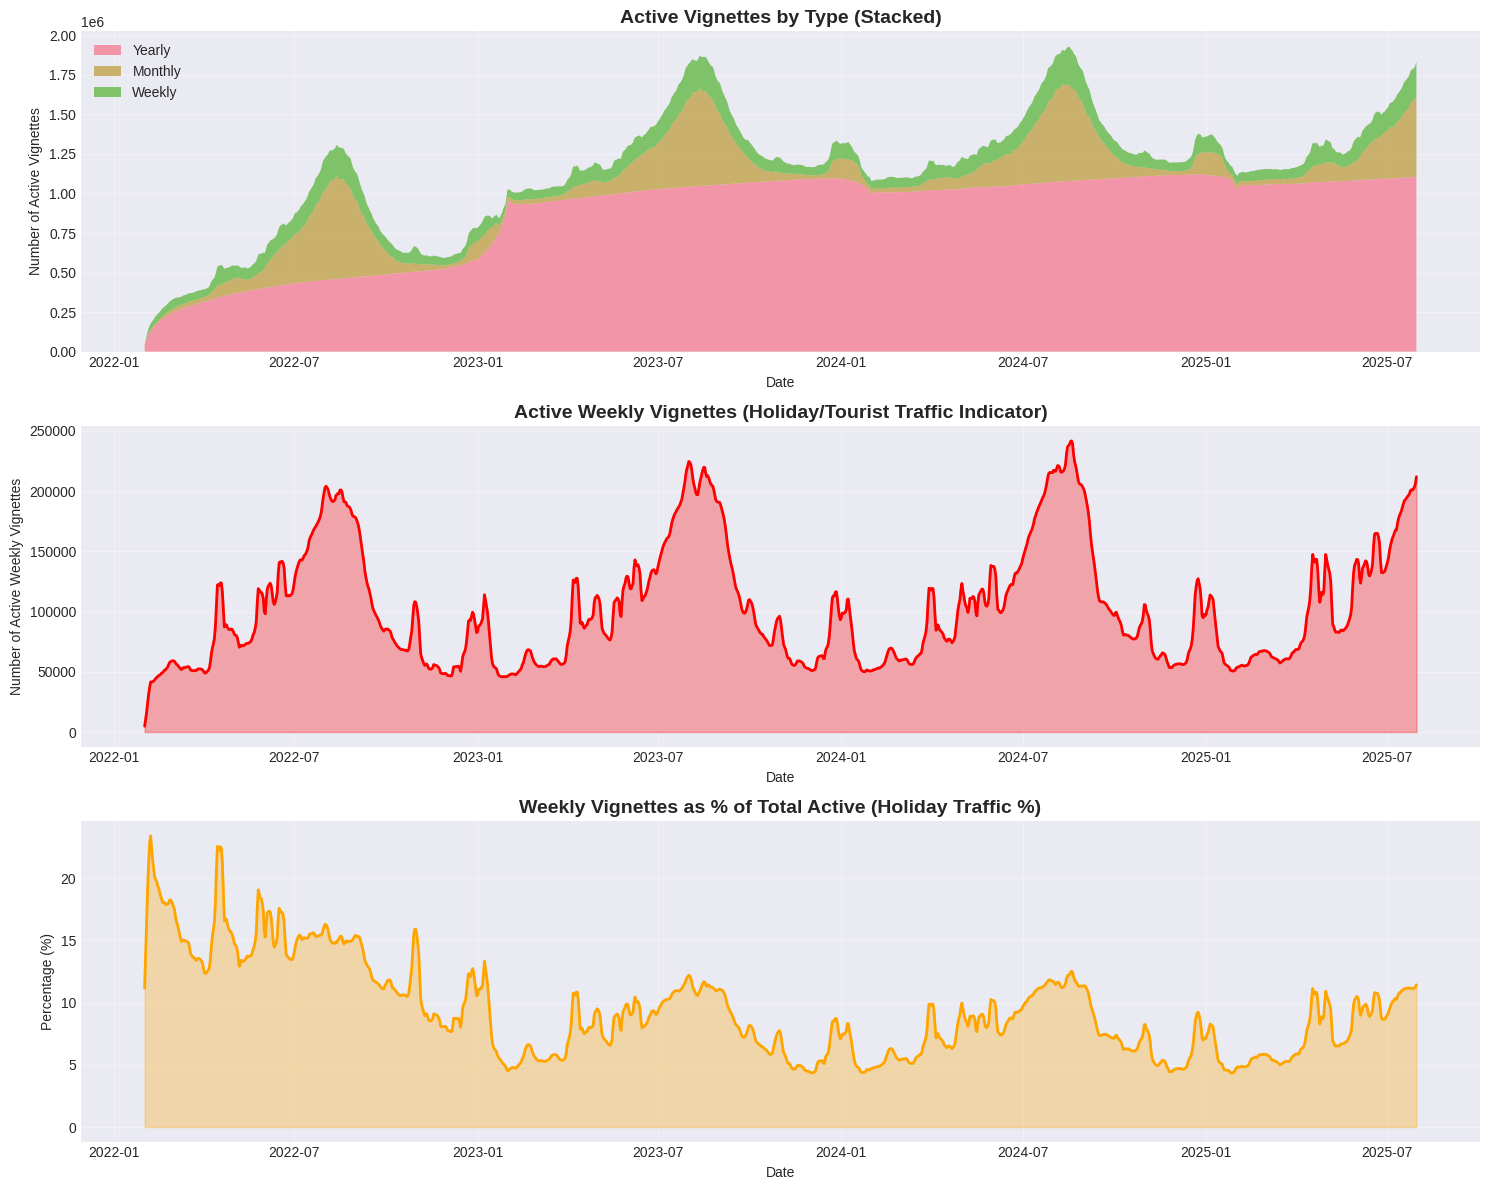

In [12]:
# Visualize active vignettes timeline
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Stacked area chart of active vignettes
axes[0].stackplot(
    active_summary.index,
    active_summary['Yearly'],
    active_summary['Monthly'],
    active_summary['Weekly'],
    labels=['Yearly', 'Monthly', 'Weekly'],
    alpha=0.7
)
axes[0].set_title('Active Vignettes by Type (Stacked)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Active Vignettes')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Weekly vignettes as holiday indicator
axes[1].plot(active_summary.index, active_summary['Weekly'], color='red', linewidth=2)
axes[1].fill_between(active_summary.index, active_summary['Weekly'], alpha=0.3, color='red')
axes[1].set_title('Active Weekly Vignettes (Holiday/Tourist Traffic Indicator)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Active Weekly Vignettes')
axes[1].grid(True, alpha=0.3)

# Ratio of weekly to total
weekly_ratio = (active_summary['Weekly'] / active_summary['Total'] * 100).fillna(0)
axes[2].plot(weekly_ratio.index, weekly_ratio, color='orange', linewidth=2)
axes[2].fill_between(weekly_ratio.index, weekly_ratio, alpha=0.3, color='orange')
axes[2].set_title('Weekly Vignettes as % of Total Active (Holiday Traffic %)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Percentage (%)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Holiday vs Regular Traffic Analysis

In [13]:
# Add temporal features
active_summary['year'] = active_summary.index.year
active_summary['month'] = active_summary.index.month
active_summary['day_of_week'] = active_summary.index.dayofweek
# Fix deprecated .week attribute
active_summary['week'] = active_summary.index.isocalendar().week.values if hasattr(active_summary.index.isocalendar(), 'week') else active_summary.index.week
active_summary['is_weekend'] = active_summary['day_of_week'].isin([5, 6])

# Calculate holiday traffic indicator
active_summary['holiday_traffic_ratio'] = active_summary['Weekly'] / active_summary['Total'] * 100
active_summary['regular_traffic_ratio'] = (active_summary['Yearly'] + active_summary['Monthly']) / active_summary['Total'] * 100

# Identify peak holiday periods (when weekly > 10% of total)
active_summary['is_holiday_period'] = active_summary['holiday_traffic_ratio'] > 10

print("Holiday periods identified:")
holiday_periods = active_summary[active_summary['is_holiday_period']]
print(f"Total days with high holiday traffic: {len(holiday_periods)}")
print(f"Average weekly vignette ratio during holidays: {holiday_periods['holiday_traffic_ratio'].mean():.2f}%")
print(f"Average weekly vignette ratio during regular days: {active_summary[~active_summary['is_holiday_period']]['holiday_traffic_ratio'].mean():.2f}%")

Holiday periods identified:
Total days with high holiday traffic: 496
Average weekly vignette ratio during holidays: 13.28%
Average weekly vignette ratio during regular days: 6.89%


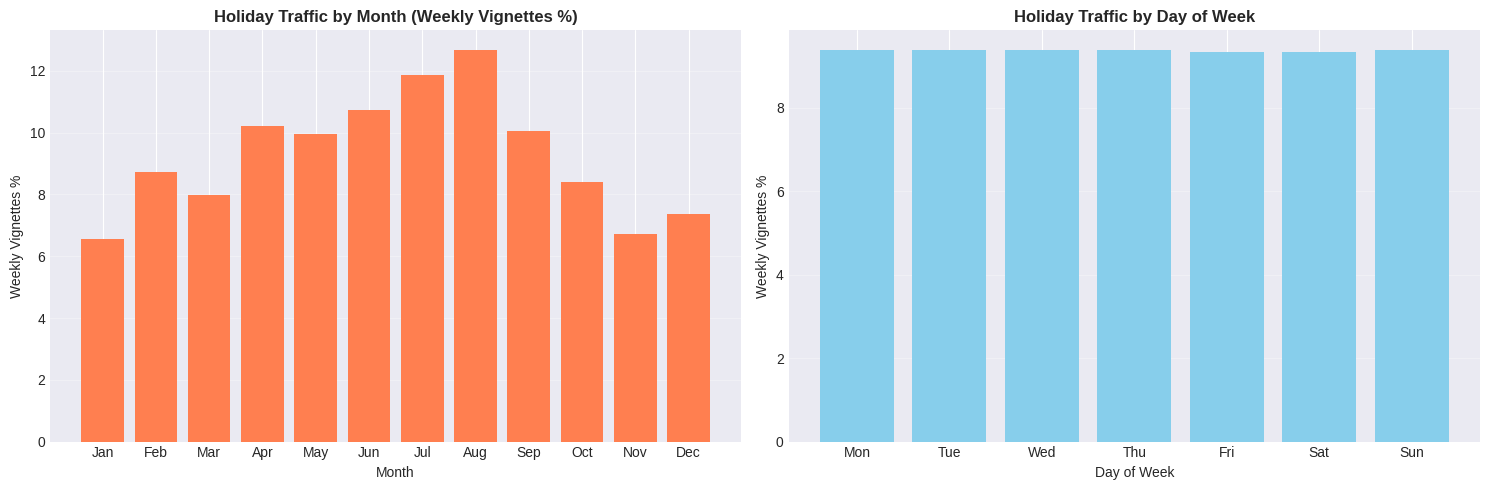


Peak holiday months:
            Total     Weekly  holiday_traffic_ratio
month                                              
8      1669139.97  206880.42                  12.68
7      1508683.49  174278.73                  11.87
6      1254239.15  127143.42                  10.75
4      1023657.45   94054.72                  10.23
9      1317358.73  128804.92                  10.06


In [15]:
# Analyze seasonal patterns
monthly_stats = active_summary.groupby('month').agg({
    'Total': 'mean',
    'Weekly': 'mean',
    'holiday_traffic_ratio': 'mean'
}).round(2)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Monthly pattern
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x_pos = range(1, 13)

axes[0].bar(x_pos, monthly_stats['holiday_traffic_ratio'], color='coral')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(months)
axes[0].set_title('Holiday Traffic by Month (Weekly Vignettes %)', fontweight='bold')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Weekly Vignettes %')
axes[0].grid(True, alpha=0.3, axis='y')

# Day of week pattern
dow_stats = active_summary.groupby('day_of_week').agg({
    'Weekly': 'mean',
    'holiday_traffic_ratio': 'mean'
}).round(2)

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1].bar(range(7), dow_stats['holiday_traffic_ratio'], color='skyblue')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(days)
axes[1].set_title('Holiday Traffic by Day of Week', fontweight='bold')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Weekly Vignettes %')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nPeak holiday months:")
print(monthly_stats.sort_values('holiday_traffic_ratio', ascending=False).head())

## 5. Year-over-Year Growth Analysis

Year-over-Year Growth Analysis:
          Total     Yearly   Monthly    Weekly  Total_growth_%  \
year                                                             
2022   696458.0   414444.0  173884.0   96917.0             NaN   
2023  1281093.0   998438.0  167566.0  104643.0       83.944043   
2024  1349964.0  1063963.0  167112.0  108119.0        5.375956   
2025  1329460.0  1078266.0  138561.0  104355.0       -1.518855   

      Yearly_growth_%  Monthly_growth_%  Weekly_growth_%  
year                                                      
2022              NaN               NaN              NaN  
2023       140.910232         -3.633457         7.971770  
2024         6.562751         -0.270938         3.321770  
2025         1.344314        -17.084949        -3.481349  


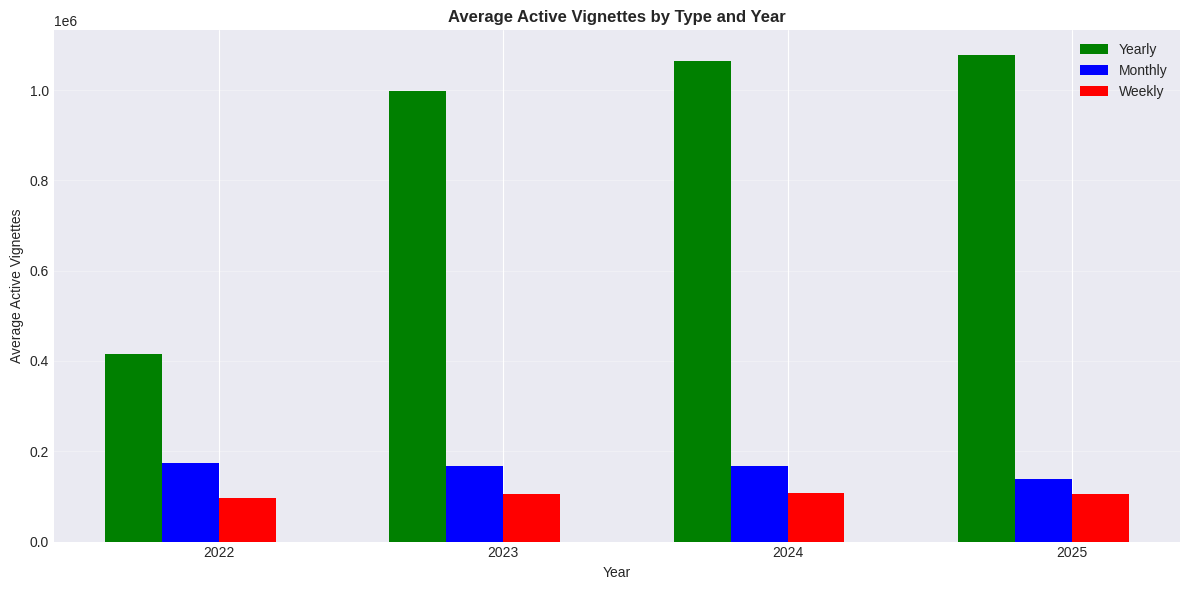

In [16]:
# Calculate year-over-year growth
yearly_summary = active_summary.groupby('year').agg({
    'Total': 'mean',
    'Yearly': 'mean',
    'Monthly': 'mean',
    'Weekly': 'mean'
}).round(0)

# Calculate growth rates
for col in ['Total', 'Yearly', 'Monthly', 'Weekly']:
    yearly_summary[f'{col}_growth_%'] = yearly_summary[col].pct_change() * 100

print("Year-over-Year Growth Analysis:")
print(yearly_summary)

# Visualize growth
fig, ax = plt.subplots(figsize=(12, 6))

x = yearly_summary.index
width = 0.2
x_pos = np.arange(len(x))

ax.bar(x_pos - 1.5*width, yearly_summary['Yearly'], width, label='Yearly', color='green')
ax.bar(x_pos - 0.5*width, yearly_summary['Monthly'], width, label='Monthly', color='blue')
ax.bar(x_pos + 0.5*width, yearly_summary['Weekly'], width, label='Weekly', color='red')

ax.set_xlabel('Year')
ax.set_ylabel('Average Active Vignettes')
ax.set_title('Average Active Vignettes by Type and Year', fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 6. Export Data for Website

In [17]:
# Prepare data for export
export_df = active_summary[[
    'Yearly', 'Monthly', 'Weekly', 'Total',
    'holiday_traffic_ratio', 'regular_traffic_ratio',
    'is_weekend', 'is_holiday_period'
]].copy()

# Round numeric columns
numeric_cols = ['Yearly', 'Monthly', 'Weekly', 'Total', 'holiday_traffic_ratio', 'regular_traffic_ratio']
export_df[numeric_cols] = export_df[numeric_cols].round(2)

# Add date components
export_df['date'] = export_df.index
export_df['year'] = export_df.index.year
export_df['month'] = export_df.index.month
export_df['day'] = export_df.index.day
export_df['day_of_week'] = export_df.index.day_name()

# Reorder columns
export_df = export_df[[
    'date', 'year', 'month', 'day', 'day_of_week', 'is_weekend',
    'Yearly', 'Monthly', 'Weekly', 'Total',
    'holiday_traffic_ratio', 'regular_traffic_ratio', 'is_holiday_period'
]]

# Save to CSV
export_df.to_csv('../data/website/vignette_active_timeline.csv', index=False)
print(f"Exported {len(export_df)} days of data to vignette_active_timeline.csv")
print("\nFirst few rows of exported data:")
print(export_df.head())

Exported 1277 days of data to vignette_active_timeline.csv

First few rows of exported data:
                 date  year  month  day day_of_week  is_weekend    Yearly  \
date                                                                        
2022-02-01 2022-02-01  2022      2    1     Tuesday       False   37270.0   
2022-02-02 2022-02-02  2022      2    2   Wednesday       False   61705.0   
2022-02-03 2022-02-03  2022      2    3    Thursday       False   79977.0   
2022-02-04 2022-02-04  2022      2    4      Friday       False   98552.0   
2022-02-05 2022-02-05  2022      2    5    Saturday        True  111828.0   

            Monthly   Weekly     Total  holiday_traffic_ratio  \
date                                                            
2022-02-01    872.0   4795.0   42937.0                  11.17   
2022-02-02   1829.0  10326.0   73862.0                  13.98   
2022-02-03   2584.0  16414.0   98977.0                  16.58   
2022-02-04   3761.0  24361.0  126677.0    

In [18]:
# Create summary statistics for website
summary_stats = {
    'analysis_period': f"{export_df['date'].min().strftime('%Y-%m-%d')} to {export_df['date'].max().strftime('%Y-%m-%d')}",
    'total_days_analyzed': len(export_df),
    'average_active_vignettes': export_df['Total'].mean(),
    'peak_active_vignettes': export_df['Total'].max(),
    'peak_date': export_df.loc[export_df['Total'].idxmax(), 'date'].strftime('%Y-%m-%d'),
    'average_holiday_traffic_percent': export_df['holiday_traffic_ratio'].mean(),
    'peak_holiday_months': monthly_stats.sort_values('holiday_traffic_ratio', ascending=False).head(3).index.tolist(),
    'weekend_vs_weekday_ratio': export_df[export_df['is_weekend']]['Weekly'].mean() / export_df[~export_df['is_weekend']]['Weekly'].mean()
}

# Save summary
summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv('../data/website/vignette_summary_stats.csv', index=False)

print("Summary Statistics:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")

Summary Statistics:
analysis_period: 2022-02-01 to 2025-07-31
total_days_analyzed: 1277
average_active_vignettes: 1155950.114330462
peak_active_vignettes: 1950380.0
peak_date: 2024-08-16
average_holiday_traffic_percent: 9.37324980422866
peak_holiday_months: [8, 7, 6]
weekend_vs_weekday_ratio: 1.0003930294864014


## 7. Key Insights Summary

In [19]:
print("="*60)
print("KEY INSIGHTS FROM VIGNETTE SALES ANALYSIS")
print("="*60)

print("\n1. TRAFFIC COMPOSITION:")
print(f"   - Regular traffic (Yearly + Monthly): {export_df['regular_traffic_ratio'].mean():.1f}%")
print(f"   - Holiday/Tourist traffic (Weekly): {export_df['holiday_traffic_ratio'].mean():.1f}%")

print("\n2. SEASONAL PATTERNS:")
top_months = monthly_stats.sort_values('holiday_traffic_ratio', ascending=False).head(3)
print("   Peak holiday traffic months:")
for month, row in top_months.iterrows():
    print(f"   - {months[month-1]}: {row['holiday_traffic_ratio']:.1f}% weekly vignettes")

print("\n3. WEEKLY PATTERNS:")
print(f"   - Weekend traffic is {summary_stats['weekend_vs_weekday_ratio']:.1f}x higher than weekdays")
peak_dow = dow_stats.sort_values('holiday_traffic_ratio', ascending=False).head(1)
print(f"   - Peak day: {days[peak_dow.index[0]]} with {peak_dow.iloc[0]['holiday_traffic_ratio']:.1f}% weekly vignettes")

print("\n4. GROWTH TRENDS:")
if len(yearly_summary) > 1:
    latest_growth = yearly_summary.iloc[-1]
    print(f"   - Total vignettes growth (YoY): {latest_growth['Total_growth_%']:.1f}%")
    print(f"   - Weekly vignettes growth (YoY): {latest_growth['Weekly_growth_%']:.1f}%")

print("\n5. IMPLICATIONS FOR TRAFFIC MANAGEMENT:")
print(f"   - {len(holiday_periods)} days identified as high holiday traffic (>10% weekly)")
print(f"   - Average {export_df['Total'].mean():.0f} active vignettes per day")
print(f"   - Peak of {export_df['Total'].max():.0f} active vignettes on {summary_stats['peak_date']}")

print("\n" + "="*60)

KEY INSIGHTS FROM VIGNETTE SALES ANALYSIS

1. TRAFFIC COMPOSITION:
   - Regular traffic (Yearly + Monthly): 89.7%
   - Holiday/Tourist traffic (Weekly): 9.4%

2. SEASONAL PATTERNS:
   Peak holiday traffic months:
   - Aug: 12.7% weekly vignettes
   - Jul: 11.9% weekly vignettes
   - Jun: 10.8% weekly vignettes

3. WEEKLY PATTERNS:
   - Weekend traffic is 1.0x higher than weekdays
   - Peak day: Mon with 9.4% weekly vignettes

4. GROWTH TRENDS:
   - Total vignettes growth (YoY): -1.5%
   - Weekly vignettes growth (YoY): -3.5%

5. IMPLICATIONS FOR TRAFFIC MANAGEMENT:
   - 496 days identified as high holiday traffic (>10% weekly)
   - Average 1155950 active vignettes per day
   - Peak of 1950380 active vignettes on 2024-08-16

